K-means คือ วิธีการสำหรับค้นหาจำนวนของคลัสเตอร์ (Cluster)จากข้อมูลที่ไม่
ปรากฎ Class หรือ ไม่มี Label ซึ่งเรียกว่า Unlabeled Data วิธีนี้เป็นวิธี Unsupervised Learning หรือแปลตรงๆคือการเรียนรู้แบบไม่ต้องสอน โดยหน้าที่หลักของ K-means คือการแบ่งกลุ่มแบบ Clustering การแบ่งกลุ่มในลักษณะนี้จะใช้พื้นฐานทางสถิติประกอบด้วย 2 กลุ่มข้อมูลขึ้นไป

การทำงานของ K-Means

    1. กำหนดกลุ่มข้อมูลขึ้นมาก่อน 2 กลุ่ม คือกลุ่มสีแดงกลุ่มสีน้ำเงิน

    2. สุ่มเลือกค่ากลาง (Centroid) เพื่อใช้เป็นตัวแทนกลุ่มสีแดง (C1) และกลุ่มสีน้ำเงิน (C2) สำหรับคำนวณหาระยะห่างเพื่อเปรียบเทียบระยะห่างระหว่างจุดข้อมูลและค่ากลางของ ทั้ง 2 กลุ่มกำหนดเป็น C1(x1,y1) และ C2(x2,y2)

    3. หากสมาชิกจุดใดใกล้เคียงกับกลุ่มใดที่สุดจะถูกให้อยู่ในกลุ่มนั้นเลย
    เช่น หากใกล้กลุ่มสีน้ำเงิน จุดนั้นจะถูกกำหนดให้อยู่กลุ่มสีน้ำเงิน
    เมื่อกำหนดค่าให้สมาชิกอยู่ในกลุ่มแล้ว ทำการคำนวณหาค่ากลางของกลุ่ม
    C1 , C2 ใหม่อีกรอบโดยปรับค่าให้อยู่ตรงกลางกลุ่มเพื่อจัดข้อมูลกลุ่มใหม่ ทำไปจนกระทั่งจุดแต่ละจุดไม่มีการเปลี่ยนแปลงหรือเปลี่ยนแปลงให้น้อยที่สุดโปรแกรมจึงจะหยุดการทำงาน
    
    4. เมื่อไม่มีการเปลี่ยนแปลงข้อมูลให้คำนวณหากลาง (Centroid) เพื่อใช้เป็นโมเดลสามารถนำไปใช้กับชุดข้อมูลทดสอบหากได้ผลดี ก็สามารถนำโมเดลไปใช้งานจริงได้

In [42]:
import os # กำหนด Path
os.chdir("/Users/phutharesuanwachirapisut/Downloads/Programming/Dataset")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
# Machine Learning  แบบไม่มีผู้สอน หรือก็คือไม่มีเฉลย หรือเรียกว่า class

In [43]:
x, y =make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)
print(x[:, 1]) # all row and column index 1 -> x[:][1]

[ 1.92991009  7.48059603  4.96698028  7.81833888  1.726729    0.36765575
  1.81716162  4.36827878  8.33265721  8.52294205  2.80114893  8.26748617
  4.47062449  7.05157615  0.12527811  4.0143625   4.49286859  0.57215086
  3.09602867  2.32340978  1.22529553  1.1384044   4.91500986  2.86268761
  2.65728761  4.63059663  0.87138001  4.64200397  2.40662884  4.07299503
  7.86788807  7.45467332  4.2012082   6.94467859  7.92336949  7.50551415
  7.54274441  7.96120222  2.55254338  0.70218697  3.71347124  2.19898652
  5.27917503  4.22628228  2.53713616  2.79315297  8.05815664  2.77443867
  7.61354197  1.40775002  3.38951262  0.66730377  7.65353061  0.7787028
  1.86242969  2.83809554  7.8131623   2.13257056  7.74616547  0.9237462
  7.39097434  4.31970261  9.04168686  2.94734506  3.07529086  2.80654471
  7.5657327   0.9418747   7.84562711  3.16480065  4.19963795  3.26013281
  8.02507778  2.96485888  2.08952471  8.35017943  2.96505806  4.65707391
  0.73799945  8.14390329  0.22430491  4.12241674  1.0

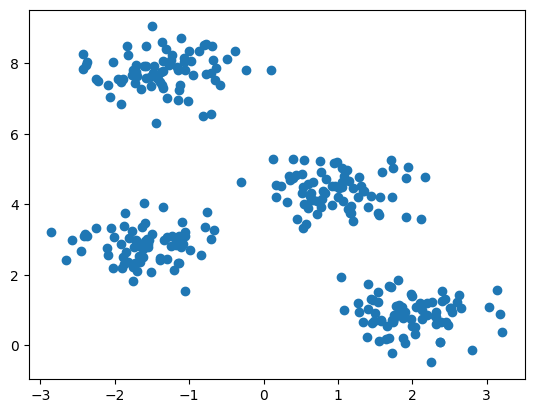

In [44]:
plt.scatter(x[:,0],x[:,1])
plt.show()

[[ 0.95415778  4.39985544]
 [ 1.99469693  0.8727049 ]
 [-1.35241261  7.76731726]
 [-1.57480456  2.84532424]]


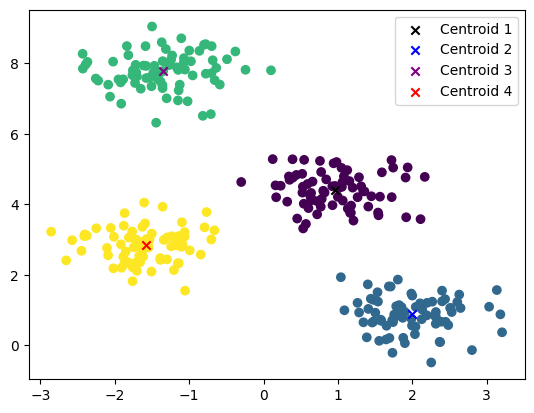

In [72]:
model = KMeans(n_clusters=4) # n_clusters default = 8
model.fit(x)
y_pred = model.predict(x)
centers = model.cluster_centers_ # ได้จุด centroid 4 จุด จาก n_cluster=4

print(centers)
plt.scatter(x[:,0],x[:,1], c=y_pred)
plt.scatter(centers[0,0],centers[0,1], c="k",       marker='x', label="Centroid 1")
plt.scatter(centers[1,0],centers[1,1], c="b",    marker='x', label="Centroid 2")
plt.scatter(centers[2,0],centers[2,1], c="purple",  marker='x', label="Centroid 3")
plt.scatter(centers[3,0],centers[3,1], c="r",       marker='x', label="Centroid 4")
plt.legend(frameon=True)
plt.show()

[[-1.35241261  7.76731726]
 [-1.57480456  2.84532424]
 [ 1.99469693  0.8727049 ]
 [ 0.95415778  4.39985544]]


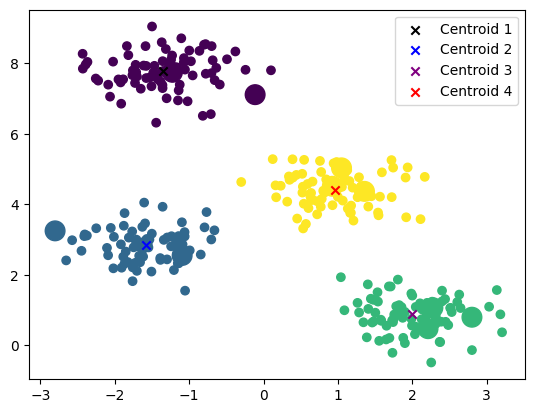

In [82]:
# New point -> ข้อมูลชุดทดสอบ
x_test, y_test =make_blobs(n_samples=10, centers=4, cluster_std=0.5, random_state=0)

model = KMeans(n_clusters=4) # n_clusters default = 8
model.fit(x)
y_pred = model.predict(x)
y_pred_test = model.predict(x_test)
centers = model.cluster_centers_ # ได้จุด centroid 4 จุด จาก n_cluster=4

print(centers)
plt.scatter(x[:,0],x[:,1], c=y_pred)
plt.scatter(x_test[:,0],x_test[:,1], c=y_pred_test, s=200)
plt.scatter(centers[0,0],centers[0,1], c="k",       marker='x', label="Centroid 1")
plt.scatter(centers[1,0],centers[1,1], c="b",    marker='x', label="Centroid 2")
plt.scatter(centers[2,0],centers[2,1], c="purple",  marker='x', label="Centroid 3")
plt.scatter(centers[3,0],centers[3,1], c="r",       marker='x', label="Centroid 4")
plt.legend(frameon=True)
plt.show()